In [2]:
#Imports
from scripts import bookdatafunctions as bdf
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Constants
JSON_PATH = "Parsed"
CONLLU_PATH = "Conllus"
ISBN2AGE_PATH = "ISBN2AGE/ISBN2AGE.xlsx"

In [3]:
#Load corpus and map ages
corpus_ages_mapped = bdf.mapGroup2Age(bdf.cleanLemmas(bdf.initBooksFromConllus(CONLLU_PATH)), ISBN2AGE_PATH)

In [4]:
#Divide sub-corpora
ages = sorted(bdf.getAvailableAges(corpus_ages_mapped))
sub_corpora = [bdf.getDistinctSubCorp(corpus_ages_mapped, x) for x in ages]

In [5]:
#Grab stats necessary for Dispersion-calculations
word_amounts_total = bdf.getTokenAmounts(corpus_ages_mapped)
word_amounts_sub = [bdf.getTokenAmounts(x) for x in sub_corpora]

word_freqs = bdf.getWordFrequencies(corpus_ages_mapped)
word_freqs_sub = [bdf.getWordFrequencies(x) for x in sub_corpora]

lemma_freqs = bdf.getLemmaFrequencies(corpus_ages_mapped)
lemma_freqs_sub = [bdf.getLemmaFrequencies(x) for x in sub_corpora]

#The length of the corpus in words (no PUNCT)
sub_l = []
for i in range(len(ages)):
    sub_l.append(bdf.getL(word_amounts_sub[i]))
l = sum(sub_l)
#The length of the corpus in parts
n = len(corpus_ages_mapped.keys())
#The percentages of the n corpus part sizes
sub_s = []
for i in range(len(ages)):
    sub_s.append(bdf.getS(word_amounts_sub[i], sub_l[i]))
s = bdf.getS(word_amounts_total, l)
#The overall frequencies of words in corpus
sub_f_words = []
for i in range(len(ages)):
    sub_f_words.append(bdf.combineFrequencies(word_freqs_sub[i]))
f_words = bdf.combineFrequencies(word_freqs)
#The overall frequencies of lemmas in corpus
sub_f_lemmas = []
for i in range(len(ages)):
    sub_f_lemmas.append(bdf.combineFrequencies(lemma_freqs_sub[i]))
f_lemmas = bdf.combineFrequencies(lemma_freqs)
#The frequencies of words in each corpus part
v_words = word_freqs
#The frequencies of lemmas in each corpus part
v_lemmas = lemma_freqs

In [6]:
#Do Dispersion-calculations
#Whole corpus
lemma_DP, lemma_DP_norm = bdf.getDP(v_lemmas, f_lemmas, s)
#Sub-corpora
sub_lemma_dp = []
for i in range(len(ages)):
    sub_lemma_dp.append(bdf.getDP(lemma_freqs_sub[i], sub_f_lemmas[i], sub_s[i])[0])
#Whole corpus
word_DP, word_DP_norm = bdf.getDP(v_words, f_words, s)
#Sub-corpora
sub_word_dp = []
for i in range(len(ages)):
    sub_word_dp.append(bdf.getDP(word_freqs_sub[i], sub_f_words[i], sub_s[i])[0])

DP calculations: 100%|██████████| 9419/9419 [00:00<00:00, 34508.91it/s]


In [8]:
print(lemma_DP)

0           0.950258
0#napaa     0.997216
0,25-0,5    0.983825
0,5-1       0.983825
0,5-2       0.983825
              ...   
⑨           0.996955
よ           0.997401
ㅚ           0.988000
埃           0.992731
狼           0.992731
Length: 136253, dtype: float64


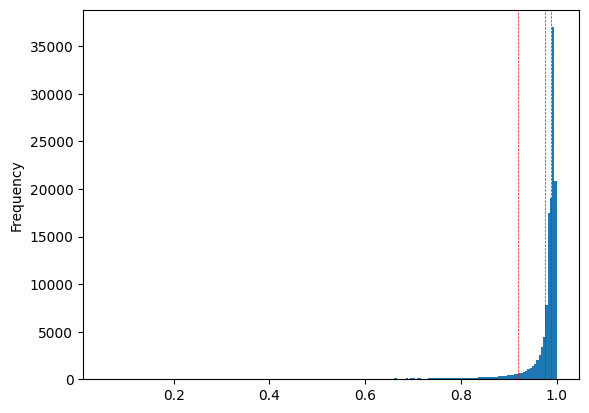

In [28]:
#Whole corpus
ax = lemma_DP.plot.hist(bins=200)
per_10 = np.percentile(lemma_DP.values, 10)
per_25 = np.percentile(lemma_DP.values, 25)
per_50 = np.percentile(lemma_DP.values, 50)
ax.axvline(per_10, color='r', linestyle='dashed', linewidth=0.5, label='60th Percentile')
ax.axvline(per_25, color='r', linestyle='dashed', linewidth=0.5, label='80th Percentile')
ax.axvline(per_50, color='r', linestyle='dashed', linewidth=0.5, label='90th Percentile')